In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../../datasets/heart.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_std = scalar.fit_transform(X)

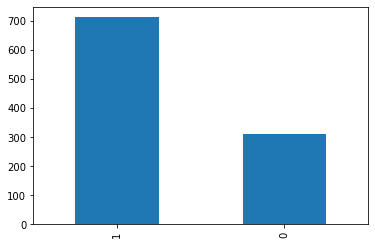

In [17]:
import seaborn as sns

(df['sex'].value_counts().sort_index(ascending=False).plot.bar())
plt.show()

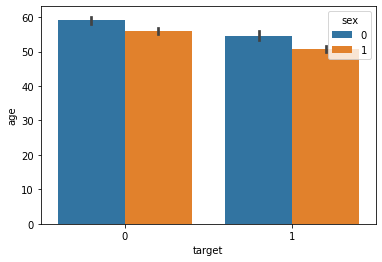

In [19]:
sns.barplot(y=df['age'],x=df['target'],hue=df['sex'])
plt.show()

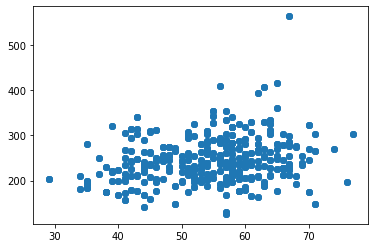

In [20]:
plt.scatter(df['age'],df['chol'])

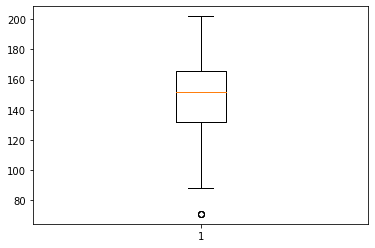

In [21]:
plt.boxplot(df['thalach'])
plt.show()

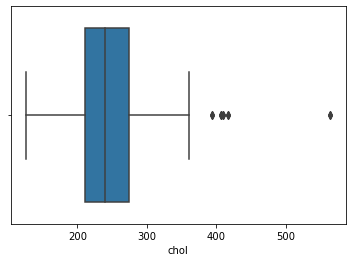

In [22]:
sns.boxplot(x=df['chol'])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_std,y,test_size=0.3,random_state=0)

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,200),verbose=True, activation='relu')

In [25]:
history=mlp.fit(X_train,y_train)

Iteration 1, loss = 0.64847210
Iteration 2, loss = 0.52180224
Iteration 3, loss = 0.44064816
Iteration 4, loss = 0.39438530
Iteration 5, loss = 0.36416803
Iteration 6, loss = 0.34574580
Iteration 7, loss = 0.33127644
Iteration 8, loss = 0.31882708
Iteration 9, loss = 0.30686929
Iteration 10, loss = 0.29504048
Iteration 11, loss = 0.28453025
Iteration 12, loss = 0.27399329
Iteration 13, loss = 0.26318333
Iteration 14, loss = 0.25304511
Iteration 15, loss = 0.24504617
Iteration 16, loss = 0.23417561
Iteration 17, loss = 0.22569619
Iteration 18, loss = 0.21685828
Iteration 19, loss = 0.20688946
Iteration 20, loss = 0.19805415
Iteration 21, loss = 0.18917204
Iteration 22, loss = 0.18039341
Iteration 23, loss = 0.17188983
Iteration 24, loss = 0.16329963
Iteration 25, loss = 0.15454005
Iteration 26, loss = 0.14748724
Iteration 27, loss = 0.13878987
Iteration 28, loss = 0.13155121
Iteration 29, loss = 0.12469301
Iteration 30, loss = 0.11710384
Iteration 31, loss = 0.11036765
Iteration 32, los

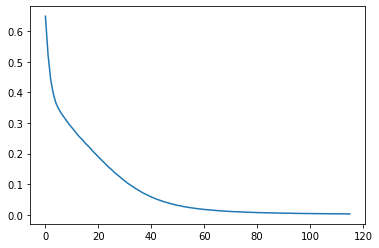

In [26]:
plt.plot(history.loss_curve_)
plt.show()

In [27]:
mlp.score(X_train,y_train)*100

100.0

In [28]:
mlp.score(X_test,y_test)*100

100.0

In [29]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [30]:
y_pred=mlp.predict(X_test)

C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


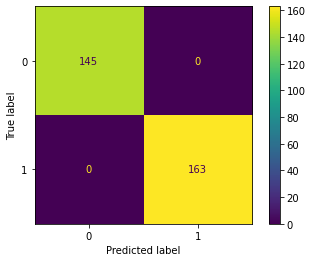

In [31]:
plot_confusion_matrix(mlp,X_test,y_pred)

In [32]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


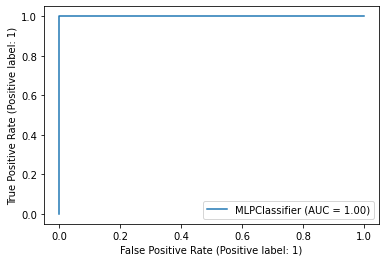

In [33]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(mlp, X_test, y_test)
plt.show()